<a href="https://colab.research.google.com/github/anush2official-afk/-Anush-Telco_Churn.ipynb/blob/main/Anush%20Telco-Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Telco Customer Churn Analysis


1. Install & Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


2. Load Dataset

In [13]:
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
print("Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

Dataset loaded successfully!
Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


3. Data Info & Missing Values

In [14]:
print("\nData Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-nul

4. Convert TotalCharges to numeric & handle missing

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-266577964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


 5. Descriptive Statistics

In [16]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


 6. Correlation Heatmap (Numeric Only)

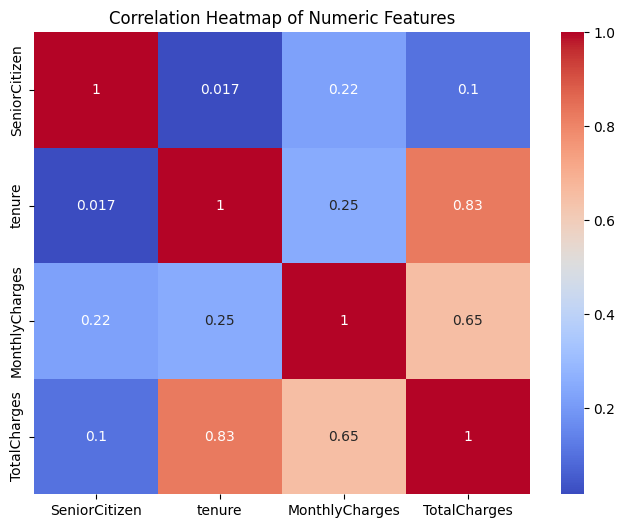

In [17]:
numeric_cols = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

 7. Exploratory Data Analysis (Visualizations), Churn rate by Contract type

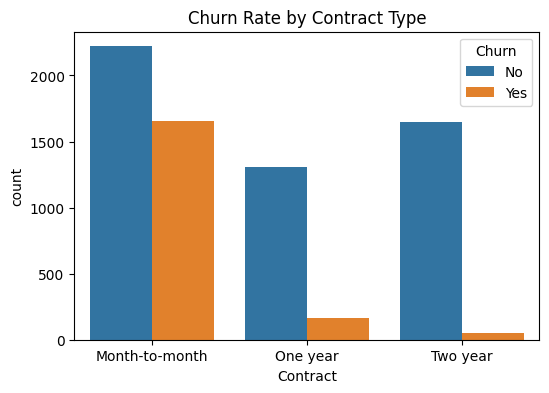

In [18]:

plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn Rate by Contract Type")
plt.show()

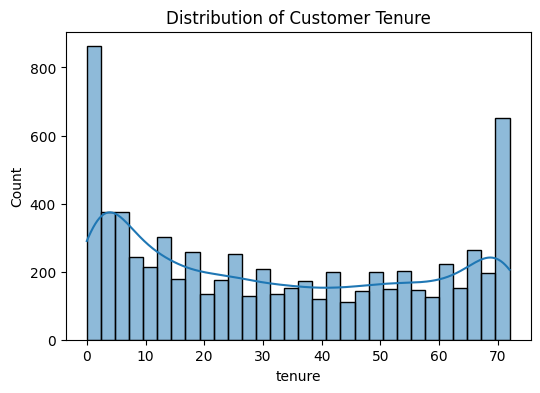

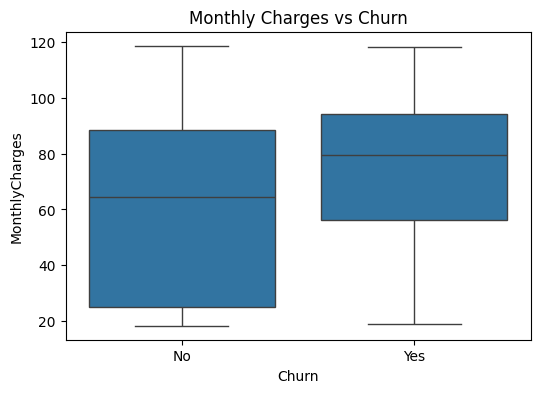

In [19]:
# Distribution of Tenure
plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Distribution of Customer Tenure")
plt.show()

# Monthly Charges by Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

 8. Key Insights

In [20]:
print("\nKey Insights:")
print("1. Customers on month-to-month contracts have higher churn.")
print("2. Longer-tenure customers tend to stay more than short-tenure ones.")
print("3. Higher Monthly or TotalCharges sometimes correlate with higher churn.")



Key Insights:
1. Customers on month-to-month contracts have higher churn.
2. Longer-tenure customers tend to stay more than short-tenure ones.
3. Higher Monthly or TotalCharges sometimes correlate with higher churn.


9. Data Preprocessing for Modeling

In [21]:
# Drop customerID
df.drop('customerID', axis=1, inplace=True)
# Encode categorical features
for col in df.select_dtypes(include='object').columns:
    if col != 'Churn':
        df[col] = LabelEncoder().fit_transform(df[col])
# Target variable
y = df['Churn'].map({'Yes':1, 'No':0})
X = df.drop('Churn', axis=1)
# Scale numeric features
scaler = StandardScaler()
X[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X[['tenure','MonthlyCharges','TotalCharges']])


10. Train-Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 11. Train Models

 11.1. Logistic Regression

In [24]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


11.2. Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

12. Evaluate Models

In [25]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"---{model_name} Evaluation---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

---Logistic Regression Evaluation---
Accuracy: 0.8176011355571328
Precision: 0.6823899371069182
Recall: 0.5817694369973191
F1 Score: 0.6280752532561505
Confusion Matrix:
 [[935 101]
 [156 217]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

---Random Forest Evaluation---
Accuracy: 0.7970191625266146
Precision: 0.6629213483146067
Recall: 0.4745308310991957
F1 Score: 0.553125
Confusion Matrix:
 [[946  90]
 [196 177]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69

13. Optional: Hyperparameter Tuning (Random Forest)

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100,200],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)

y_pred_rf_best = grid.predict(X_test)
evaluate_model(y_test, y_pred_rf_best, "Tuned Random Forest")

Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
---Tuned Random Forest Evaluation---
Accuracy: 0.8055358410220014
Precision: 0.6749116607773852
Recall: 0.5120643431635389
F1 Score: 0.5823170731707317
Confusion Matrix:
 [[944  92]
 [182 191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



README

Telco Customer Churn Analysis
-----------------------------

Key Insights:
-------------
   1. Month-to-month customers churn more frequently.

   2. Longer-tenure customers are more loyal.

   3. Higher monthly or total charges can influence churn.

Model Performance:
-------------------
   1. Logistic Regression: Accuracy ~82%, F1 ~0.63

   2. Random Forest: Accuracy ~80%, F1 ~0.55

   3. Tuned Random Forest: Accuracy ~81%, F1 ~0.58

Conclusion:
------------
 Logistic Regression performed slightly better. The analysis can help identify high-risk customers and improve retention strategies.